IMPORTA CSV E LE 

In [4]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv"
dados = pd.read_csv(uri)
dados.head()

,home,how_it_works,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


RENOMEAR O NOME DAS COLUNAS

In [13]:
mapa = {"home" : "inicio",
        "how_it_works" : "como_funciona",
        "contact" : "contato",
        "bought": "comprou"}
dados = dados.rename(columns=mapa)

In [16]:
x = dados[["inicio","como_funciona","contato"]]
y = dados["comprou"]
y
x


,inicio,como_funciona,contato
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0
...,...,...,...
94,0,0,1
95,1,1,1
96,0,0,1
97,0,1,0


FAZENDO O SPLIT MANUAL PARA SEPARAR OS TREINOS E OS TESTE

In [17]:
dados.shape

(99, 4)

In [18]:
treino_x = x[:75]
treino_x.shape

(75, 3)

In [19]:
treino_y = y[0:75]
treino_y.shape

(75,)

In [20]:
teste_x = x[75:]
teste_x.shape

(24, 3)

In [21]:
teste_y = y[75:]
teste_y.shape

(24,)

TREINANDO OS DADOS

In [22]:
from sklearn.svm import LinearSVC

modelo = LinearSVC()
modelo.fit(treino_x,treino_y)

LinearSVC()

FAZENDO PREVISÕES COM OS TESTE

In [23]:
previsoes = modelo.predict(teste_x)

In [25]:
from sklearn.metrics import accuracy_score

acuracia = accuracy_score(teste_y,previsoes)

In [29]:
print("O algoritimo acertou :", round(acuracia,2)*100 , "%")

O algoritimo acertou : 96.0 %


FAZENDO O TREIN E O TESTE COM A BIBLIOTECA TRAIN_TEST_SPLIT STRATIFY PARA MANTER A PROPORÇÃO

In [108]:
from sklearn.model_selection import train_test_split
SEED = 20

treino_x,teste_x,treino_y,teste_y = train_test_split(x,y,test_size = 0.25,random_state = SEED, stratify = y)

from sklearn.svm import LinearSVC

modelo = LinearSVC()
modelo.fit(treino_x,treino_y)

previsoes = modelo.predict(teste_x)

from sklearn.metrics import accuracy_score

#MEDINDO A ACURÁCIA
acuracia = accuracy_score(teste_y,previsoes)

print("O algoritimo acertou :", round(acuracia,2)*100 , "%")

O algoritimo acertou : 96.0 %


 Métricas para validação do modelo :

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(teste_y, previsoes))
print('MSE:', metrics.mean_squared_error(teste_y, previsoes))
print('RMSE:', np.sqrt(metrics.mean_squared_error(teste_y, previsoes)))

MAE: 0.04
MSE: 0.04
RMSE: 0.2


GRAFICO REAL E ESTIMADO


Text(0, 0.5, 'Y Estimado')

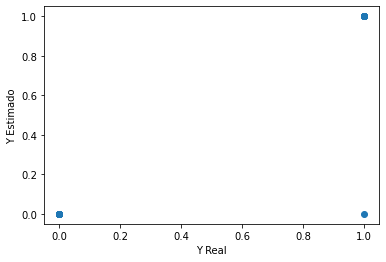

In [74]:
plt.scatter(teste_y,previsoes)
plt.xlabel('Y Real')
plt.ylabel('Y Estimado')


EXEMPLO ENTRADA DE APÍ

In [106]:
inicio = 1

como_funciona = 0

contato = 1

new_client = np.array([inicio, como_funciona, contato]).reshape(1,-1)

predição = modelo.predict(new_client)

if predição == 1 :
    print("Esse cliente comprou")
else:
    print("Esse cliente não comprou")
    


Esse cliente comprou
